# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [210]:
import time
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

warnings.filterwarnings("ignore")

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [211]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.shape

(41188, 21)

In [212]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [213]:

# check missing values in the data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [214]:
print('Percent of "unknow" s in data set') 
print( (df.isin(['unknown']).sum()/df.shape[0])  *100) 

Percent of "unknow" s in data set
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64


In [215]:
# Drop all unknown values
df_clean = df[~df.isin(['unknown']).any(axis=1)]

# Convert to binary
binary_columns = ['default', 'housing', 'loan', 'y']
df_clean[binary_columns] = df_clean[binary_columns].replace({'yes': 1, 'no': 0})

print("Rows removed from original dataframe:  " + str(df.shape[0]- df_clean.shape[0] ))

Rows removed from original dataframe:  10700


Age in between 20 to 80 (no Minors)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

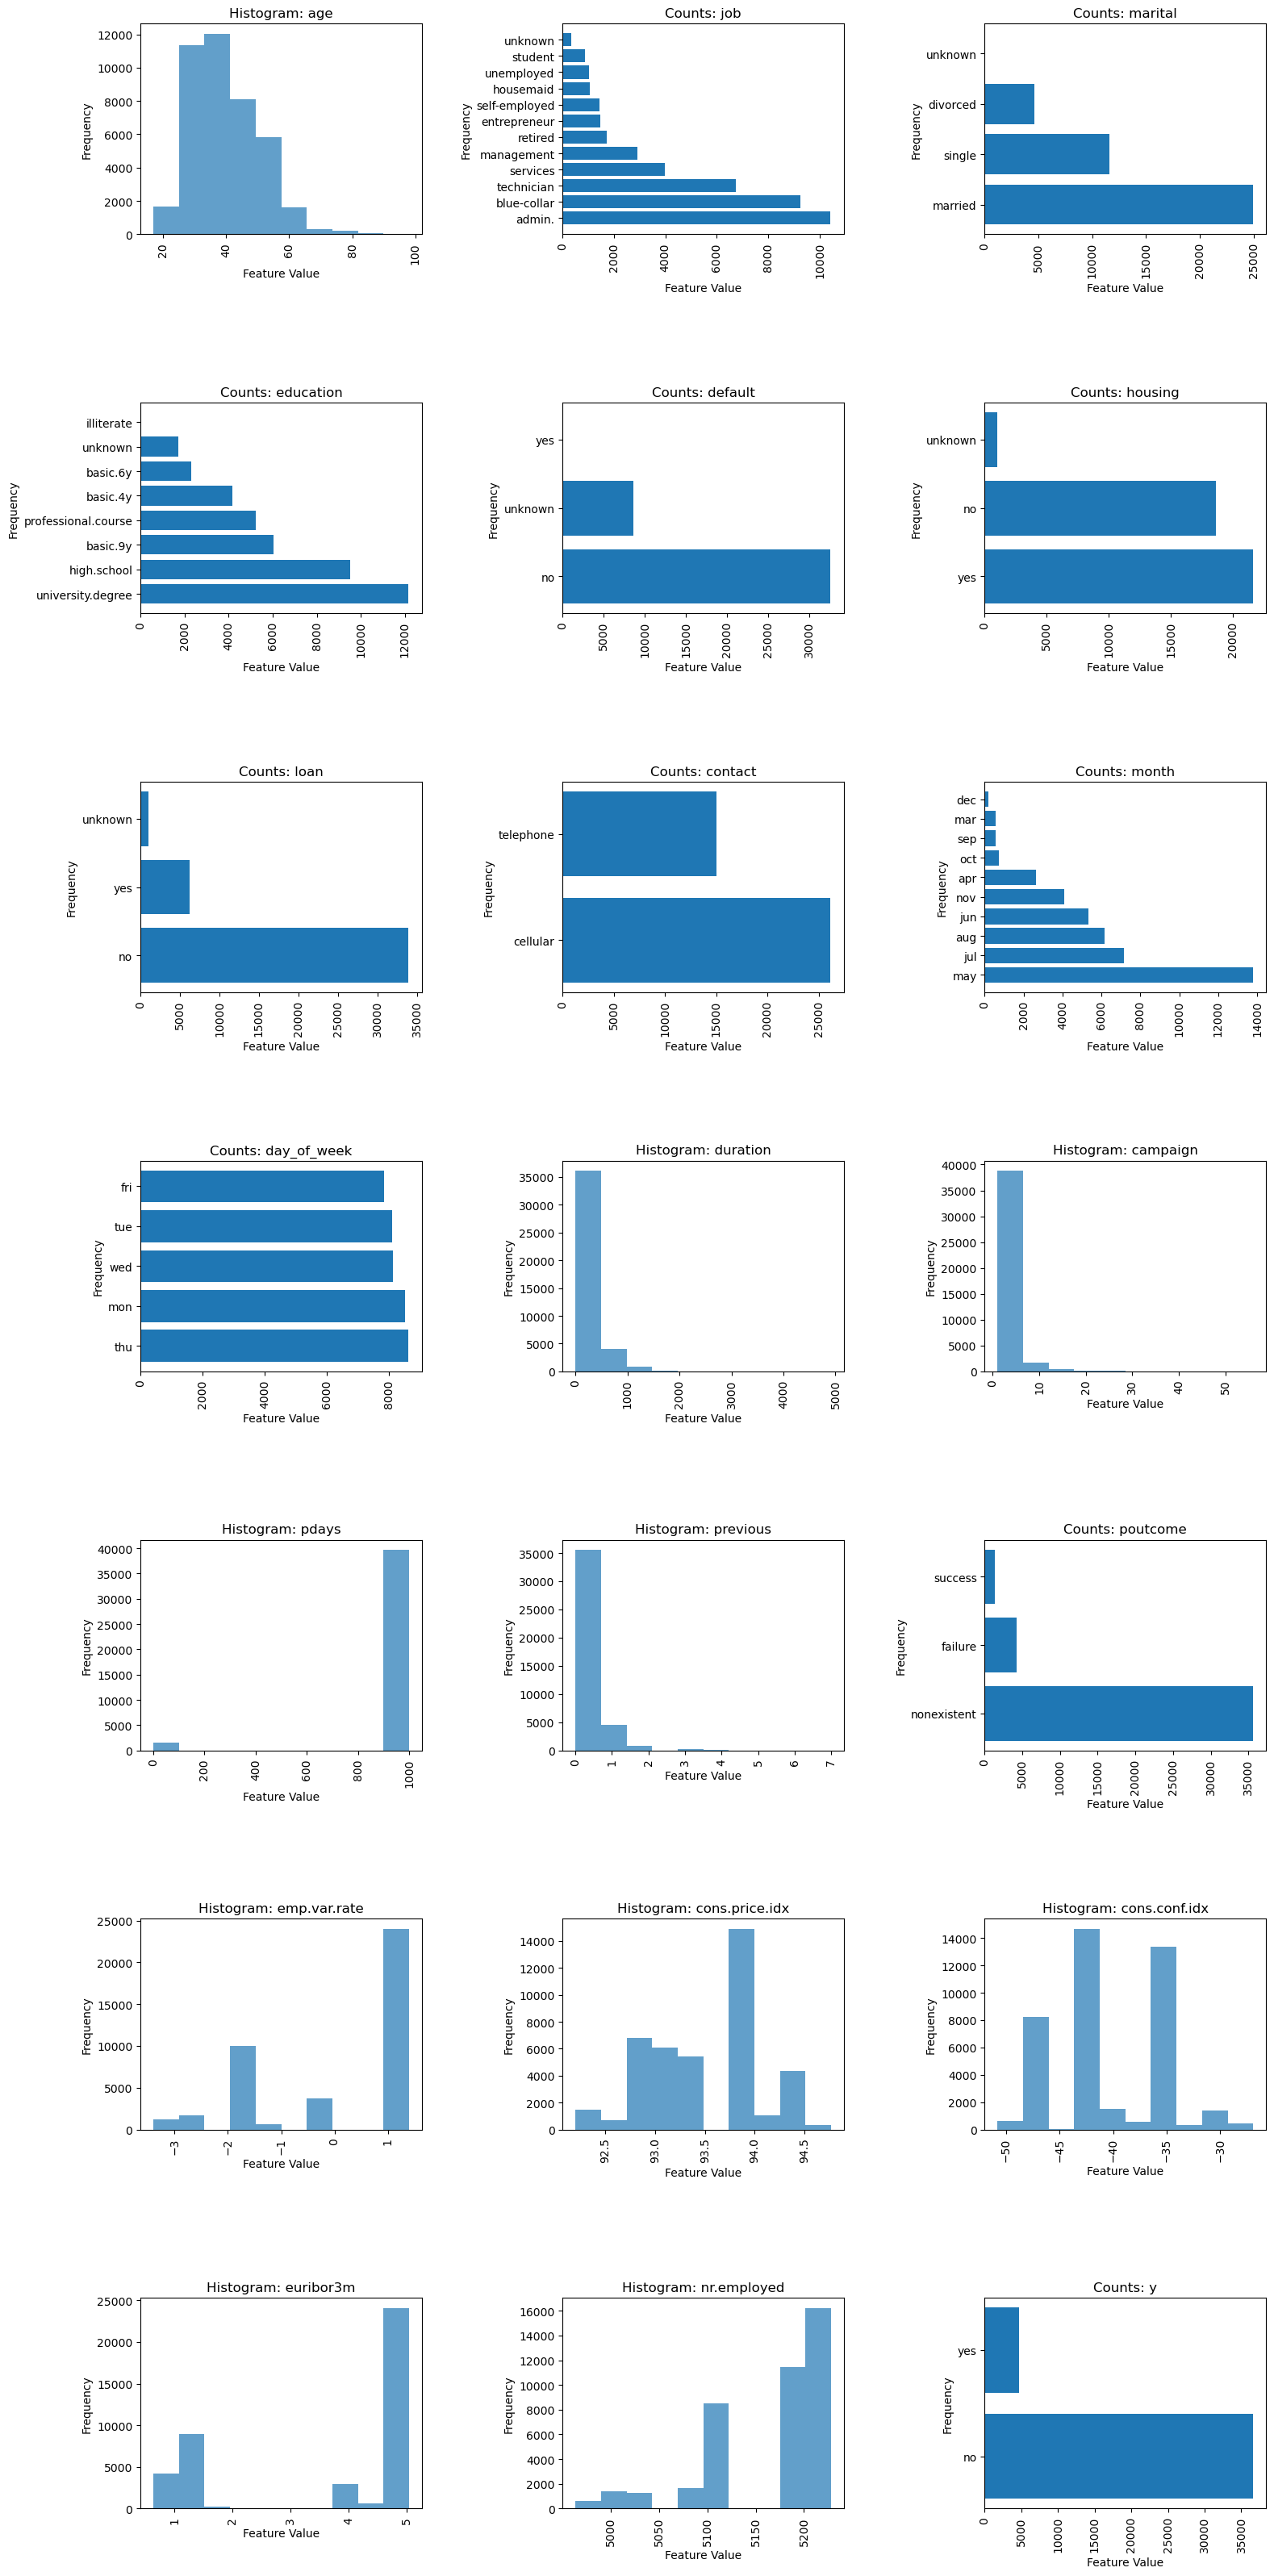

In [ ]:
fig, axs = plt.subplots(7, 3, figsize=(18, 40))
catagorical = df.select_dtypes(['object']).columns.tolist()

for ax, column in zip(axs.flat, df.columns):
    if column in catagorical:
        category_counts = df[column].value_counts()
        categories = category_counts.index
        counts = category_counts.values
        ax.barh(categories, counts)
        ax.set_title(f'Counts: {column}')
    else:
        ax.hist(df[[column]], alpha=0.7)
        ax.set_title(f'Histogram: {column}')
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Frequency')
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.show()


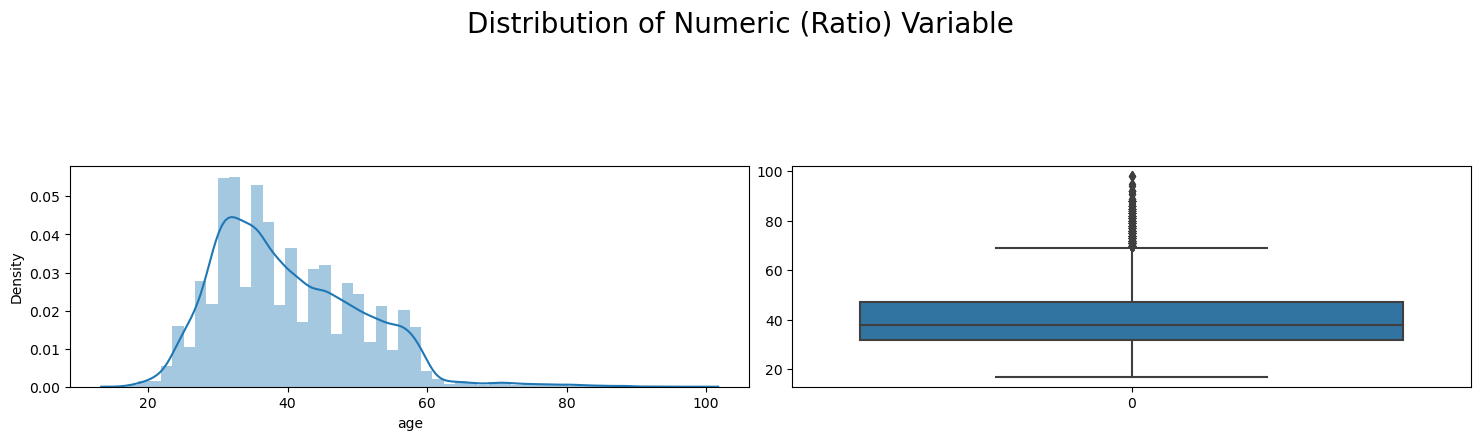

In [217]:


# ratio variable distribution 

fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(df["age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()





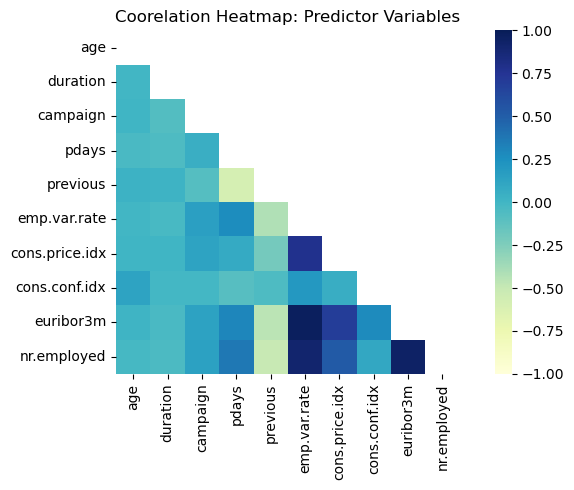

In [218]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(df.corr())

# set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(df.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)



# show figure & plots
plt.tight_layout()
plt.show()

In [219]:
df_clean.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,0.000098,0.541885,0.156389,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,0.009919,0.498251,0.363230,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,0.000000,1.000000,0.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,0.000000,1.000000,0.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,1.000000,1.000000,1.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [220]:
df_clean.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,0,1,0,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [221]:
df_feat = df_clean[df_clean.columns[:7].to_list() + ['y']]
df_feat



,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,0,0,0,0
2,37,services,married,high.school,0,1,0,0
3,40,admin.,married,basic.6y,0,0,0,0
4,56,services,married,high.school,0,0,1,0
6,59,admin.,married,professional.course,0,0,0,0
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1
41184,46,blue-collar,married,professional.course,0,0,0,0
41185,56,retired,married,university.degree,0,1,0,0
41186,44,technician,married,professional.course,0,0,0,1


In [222]:
numeric_features = ['age']
categorical_features = ['job', 'marital', 'education']
binary_features = ['default', 'housing', 'loan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bin', 'passthrough', binary_features)
    ])

In [223]:
X_train

array([[ 1.25515694, -0.00992013, -1.08759349, ..., -0.0189981 ,
        -0.40636394, -0.72015916],
       [-1.16419171, -0.00992013,  0.91946119, ..., -0.0189981 ,
        -0.40636394, -0.72015916],
       [ 0.86806115, -0.00992013,  0.91946119, ..., -0.0189981 ,
        -0.40636394, -0.72015916],
       ...,
       [ 1.44870483, -0.00992013,  0.91946119, ..., -0.0189981 ,
        -0.40636394, -0.72015916],
       [ 1.06160905, -0.00992013, -1.08759349, ..., -0.0189981 ,
        -0.40636394,  1.38858194],
       [-0.2932262 , -0.00992013,  0.91946119, ..., -0.0189981 ,
        -0.40636394, -0.72015916]])

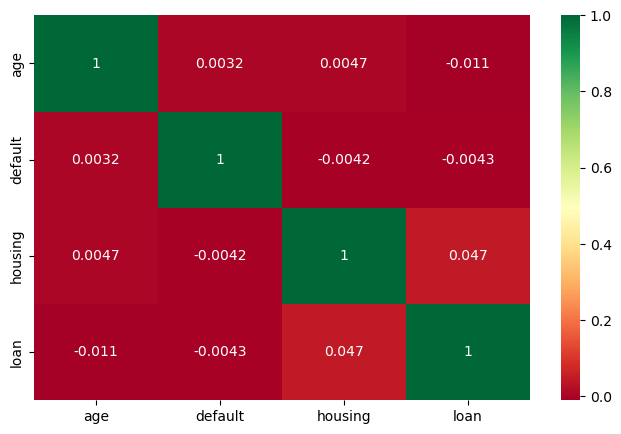

In [224]:
Selected_features = ["age","job","marital", "education","default","housing","loan"] 

X = df_feat[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [230]:
#X = df_clean.drop('y', axis=1)
print(X)
y = df_clean['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

       age          job  marital            education  default  housing  loan  \
0       56    housemaid  married             basic.4y        0        0     0   
2       37     services  married          high.school        0        1     0   
3       40       admin.  married             basic.6y        0        0     0   
4       56     services  married          high.school        0        0     1   
6       59       admin.  married  professional.course        0        0     0   
...    ...          ...      ...                  ...      ...      ...   ...   
41183   73      retired  married  professional.course        0        1     0   
41184   46  blue-collar  married  professional.course        0        0     0   
41185   56      retired  married    university.degree        0        1     0   
41186   44   technician  married  professional.course        0        0     0   
41187   74      retired  married  professional.course        0        1     0   

         contact month day_

ValueError: could not convert string to float: 'housemaid'

scores = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train.values.ravel())
    score = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    scores[model_name] = score
    print(f"{model_name} with accuracy score {score:.3f}")

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [231]:

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")      


In [232]:


#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)



Random Forest:
---------------------------------------------------------------
Accuracy: 1.0
Accuracy w/Scaled Data (ss): 1.0
Accuracy w/Scaled Data (mm): 1.0

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 1.0
Accuracy w/Scaled Data (ss): 1.0
Accuracy w/Scaled Data (mm): 1.0

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      91

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

Random Forest:
---------------------------------------------------------------
Accuracy: 1.0
Accuracy w/Scaled Data (ss): 1.0
Accuracy w/Scaled Data (mm): 1.0

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 1.0
Accuracy w/Scaled Data (ss): 1.0
Accuracy w/Scaled Data (mm): 1.0

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147

                            -----------------------------------               

KNN:
---------------------------------------------------------------
Accuracy: 0.99552
Accuracy w/Scaled Data (ss): 0.99585
Accuracy w/Scaled Data (mm): 0.99585

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      0.97      0.98      1173

    accuracy                           1.00      9147
   macro avg       1.00      0.98      0.99      9147
weighted avg       1.00      1.00      1.00      9147

                            -----------------------------------               

SVM:
---------------------------------------------------------------
Accuracy: 0.99978
Accuracy w/Scaled Data (ss): 0.99978
Accuracy w/Scaled Data (mm): 0.99978

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7974
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147

                            -----------------------------------               

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [236]:
base_model_performance = pd.DataFrame({
    "model": ["Logistic Regression", "KNN", "Decision Tree", "SVM"],
    "fit time": [Logistic_regression_fit_time, KNN_fit_time, Decision_tree_fit_time, SVC_fit_time],
    "train accuracy": [Logistic_regression_train_accuracy, KNN_train_accuracy, Decision_tree_train_accuracy, SVC_train_accuracy],
    "test accuracy": [Logistic_regression_test_accuracy, KNN_test_accuracy, Decision_tree_test_accuracy, SVC_test_accuracy]
})
base_model_performance

,model,fit time,train accuracy,test accuracy
0,Logistic Regression,0.000049,0.874139,0.871761
1,KNN,0.062856,0.919263,0.889909
2,Decision Tree,0.236251,1.000000,0.878539
3,SVM,9.712661,0.916171,0.899639


In [237]:
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [238]:


#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))



In [ ]:
# Number of neighbors (took 40 mins to complete)
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits


Problem 11: Improving the Model
Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.
More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
Adjust your performance metric

##### Questions